<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-Projects/blob/main/Project%202%20Text%20Summarization/Project2_Clean_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/train_reformed.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/test_reformed.csv')
dev_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/dev_reformed.csv')

# Basic overview
print(train_df.shape)
print(train_df.info())
print(train_df.isnull().sum())

(193883, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         193883 non-null  int64 
 1   url        193883 non-null  object
 2   text       193883 non-null  object
 3   summary    193883 non-null  object
 4   e_summary  193883 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.4+ MB
None
id           0
url          0
text         0
summary      0
e_summary    0
dtype: int64


In [16]:
# prompt: show the most longer text in train_df, show the count of words

longest_text = train_df.loc[train_df['article_word_length'].idxmax()]
print("The longest text in train_df:\n")
print(longest_text['text'])
print("\nWord count:", longest_text['article_word_length'])


The longest text in train_df:

  liputan6       com       jakarta       tim    8   yang   bentuk   presiden   rekomendasi   agar   proses   hukum   hadap   pimpin   non   aktif   kpk       bibit   samad   riyanto   dan   chandra   hamzah   henti   karena   tidak   cukup   bukti         ikut   ini   adalah   isi   lapor   dan   rekomendasi   tim    8       bab    i   -   iii       yang   serah   kepada   presiden   selasa       17 11           bab   ipendahuluan    a         latar   belakang    1         proses   hukum   hadap   chandra   m         hamzah       lanjut   sebut       chandra           dan   bibit   samad   rianto       lanjut   sebut       bibit           jadi   isu   strategis   di   masyarakat   karena   timbul   curiga   ada   rekayasa   hadap   proses   hukum   sebut          2         curiga   masyarakat   timbul   karena   jumlah   alas       di   antara        a         edar   transkrip   rekam   bicara   antasari   azhar   dengan   anggoro   widjojo   di   singapu

In [17]:
longest_text = train_df.loc[train_df['summary_word_length'].idxmax()]
print(longest_text['text'])
print(longest_text['text'])
print("\nWord count:", longest_text['summary_word_length'])

  buat   para   gemar   kelompok   flower   four       f4       atau    f   tse   di   tanah   air       hari   ini   sudah   lama   mereka   tunggu         sebab       kelompok   pemuda   asal   taiwan   itu   gelar   konser   musik   di   arena   pekan   raya   jakarta       mayor       jakarta   pusat       jumat       10 1             hari   belum       grup   yang   motor   vic   zhou       ken   zhou       vannes   jian   wu       dan   jerry   yan   ini   laku   jumpa   pers   di   hotel   borobudur       jakpus         empat   aku   senang   bisa   tampil   di   indonesia   dan   dapat   sambut   yang   luar   biasa   dari   gemar         dalam   konser   nanti   malam       banyak   100   tempat   duduk   kelas   very   very   important   person   sedia   untuk   keluarga   presiden   megawati   sukarnoputri         telah   dua   kali   konser   di   indonesia       kelompok   yang   lejit   telah   bintang   serial       meteor   garden       ini   lanjut   jalan   ke   malay

In [18]:
longest_text = train_df.loc[train_df['esummary_word_length'].idxmax()]
print(longest_text['text'])
print(longest_text['text'])
print("\nWord count:", longest_text['esummary_word_length'])

  piala   dunia   1982tuan   rumah       spanyolnegara   serta       109juara       italiababak   sisih   grup   grup   apolandiaitaliakamerunperu   grup    b   jerman   barataustriaaljazairchili   grup    c   belgiaargentinahungariael   salvador   grup   d   inggrispranciscekoslowakiakuwait   grup    e   irlandia   utaraspanyolyugoslavia   honduras   grup    f   brasiluni   sovietskotlandiaselandia   baru   putar   dua   grup   1polandiauni   sovietbelgia   grup    2   jerman   baratinggrisspanyol   grup    3   italiabrasilargentina   grup    4   prancisaustriairlandia   utara   semifinalitalia   vs   polandia    2-0jerman   barat   vs   prancis    5-4        3-3       juara   ke-3polandia   vs   prancis    3-2   finalitalia   vs   jerman   barat    3-1   top   skorpaolo   rossi       ita        6   golkarl-heinz   rummenigge       jer        5   golzbigniew   boniek       pol        4   golzico       bra        4   gollaszlo   kiss       hun        3   golalain   giresse       pra   

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

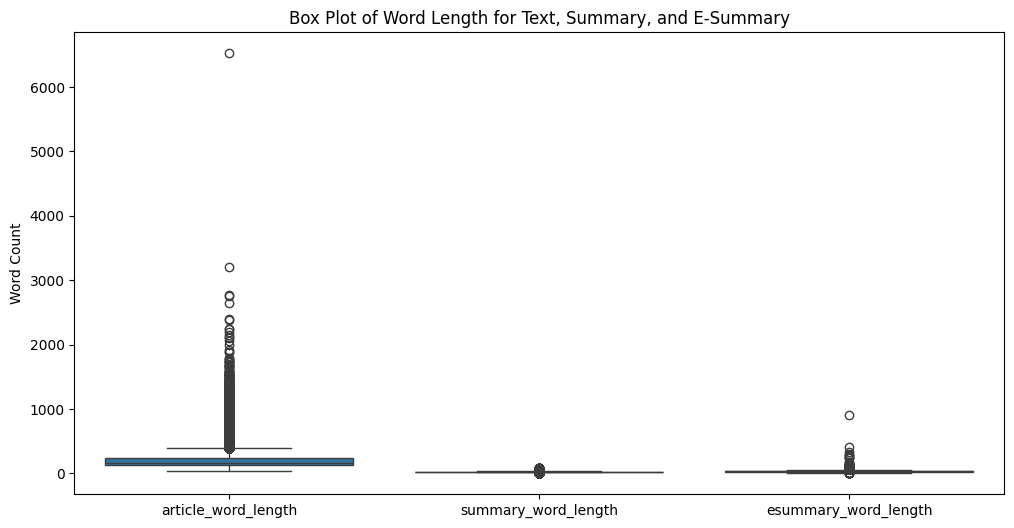

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[['article_word_length', 'summary_word_length', 'esummary_word_length']])
plt.title('Box Plot of Word Length for Text, Summary, and E-Summary')
plt.ylabel('Word Count')
plt.show()


In [34]:
# prompt: find the outlier in article_word_length

Q1 = train_df['article_word_length'].quantile(0.25)
Q3 = train_df['article_word_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_df[(train_df['article_word_length'] < lower_bound) | (train_df['article_word_length'] > upper_bound)]

print("Outliers in 'article_word_length':")
print(outliers)


Outliers in 'article_word_length':
            id                                                url  \
58      246383  https://www.liputan6.com/news/read/246383/chel...   
119     255156  https://www.liputan6.com/news/read/255156/ani-...   
140     253467  https://www.liputan6.com/news/read/253467/barc...   
148      53851  https://www.liputan6.com/news/read/53851/pemer...   
149     128084  https://www.liputan6.com/news/read/128084/soal...   
...        ...                                                ...   
193805   41864  https://www.liputan6.com/news/read/41864/akal-...   
193812  121893  https://www.liputan6.com/news/read/121893/peme...   
193814  140292  https://www.liputan6.com/news/read/140292/ujia...   
193842   38988  https://www.liputan6.com/news/read/38988/jumla...   
193866  210254  https://www.liputan6.com/news/read/210254/raha...   

                                                     text  \
58        liputan6       com       london       kandid...   
119       lipu

In [35]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to remove outliers in relevant columns
text_cleaned = remove_outliers(train_df, 'article_word_length')
summary_cleaned = remove_outliers(train_df, 'summary_word_length')
esummary_cleaned = remove_outliers(train_df, 'esummary_word_length')

In [36]:
text_cleaned.shape


(184745, 11)

In [37]:
summary_cleaned.shape


(186164, 11)

In [38]:
esummary_cleaned.shape

(189817, 11)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

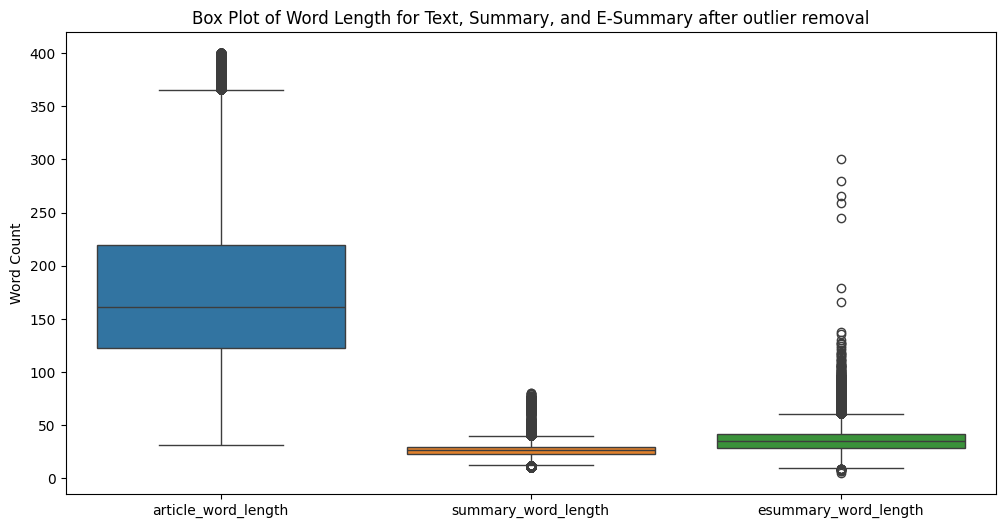

In [39]:
# prompt: show plot box based on text_cleaned

plt.figure(figsize=(12, 6))
sns.boxplot(data=text_cleaned[['article_word_length', 'summary_word_length', 'esummary_word_length']])
plt.title('Box Plot of Word Length for Text, Summary, and E-Summary after outlier removal')
plt.ylabel('Word Count')
plt.show()


In [46]:
# prompt: drop the column article_word_length, summary_word_length, esummary_word_length

train_df = train_df.drop(['article_word_length', 'summary_word_length', 'esummary_word_length'], axis=1)


In [48]:
train_df.loc[1]

,1
id,205215
url,https://www.liputan6.com/news/read/205215/defo...
text,striker timnas inggris yang main s...
summary,tanding lawan manchester city rupa ...
e_summary,striker timnas inggris yang main sama tottenha...
text_length,3277
summary_length,268
e_summary_length,219


In [49]:
# prompt: delete data row with outlier based on text_length

Q1 = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3 = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df_filtered = train_df[
    train_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound, upper_bound)
]
print(train_df_filtered.shape)


(184745, 8)


In [51]:
train_df.shape

(193883, 8)

In [52]:
train_df_filtered.loc[1]

,1
id,205215
url,https://www.liputan6.com/news/read/205215/defo...
text,striker timnas inggris yang main s...
summary,tanding lawan manchester city rupa ...
e_summary,striker timnas inggris yang main sama tottenha...
text_length,3277
summary_length,268
e_summary_length,219


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

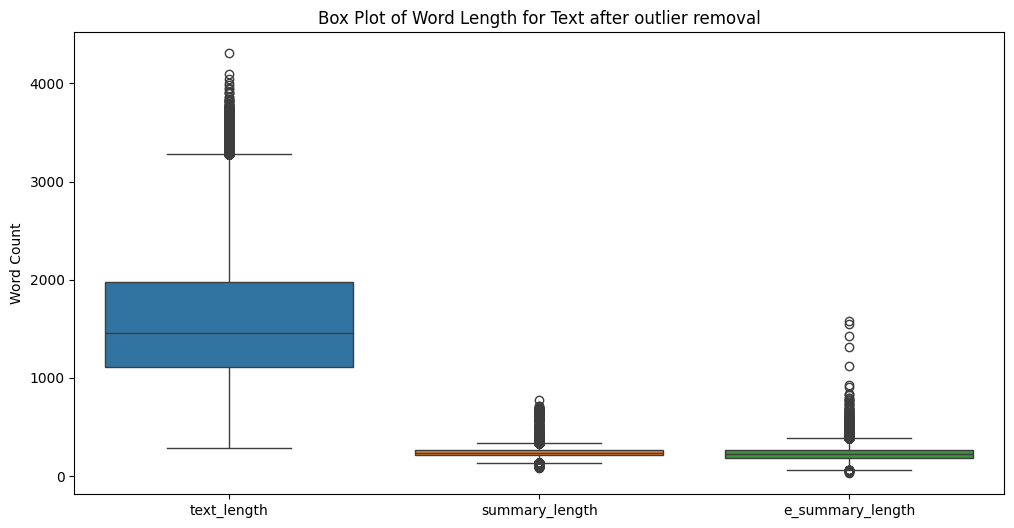

In [56]:
# prompt: show boxplot of train_df_filtered

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df_filtered[['text_length','summary_length','e_summary_length']])
plt.title('Box Plot of Word Length for Text after outlier removal')
plt.ylabel('Word Count')
plt.show()


In [57]:
# prompt: delete the row with outlier in 'text_length','summary_length','e_summary_length' column

# Calculate the IQR for each column
Q1_text = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_text = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

Q1_summary = train_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_summary = train_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
lower_bound_summary = Q1_summary - 1.5 * IQR_summary
upper_bound_summary = Q3_summary + 1.5 * IQR_summary


Q1_e_summary = train_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_e_summary = train_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
lower_bound_e_summary = Q1_e_summary - 1.5 * IQR_e_summary
upper_bound_e_summary = Q3_e_summary + 1.5 * IQR_e_summary


# Filter out rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
train_df_no_outliers = train_df[
    train_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
    train_df['summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
    train_df['e_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary)
]

print("Original DataFrame shape:", train_df.shape)
print("DataFrame shape after removing outliers:", train_df_no_outliers.shape)


Original DataFrame shape: (193883, 8)
DataFrame shape after removing outliers: (174494, 8)


In [58]:
train_df_no_outliers.iloc[1]

,1
id,205215
url,https://www.liputan6.com/news/read/205215/defo...
text,striker timnas inggris yang main s...
summary,tanding lawan manchester city rupa ...
e_summary,striker timnas inggris yang main sama tottenha...
text_length,3277
summary_length,268
e_summary_length,219


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

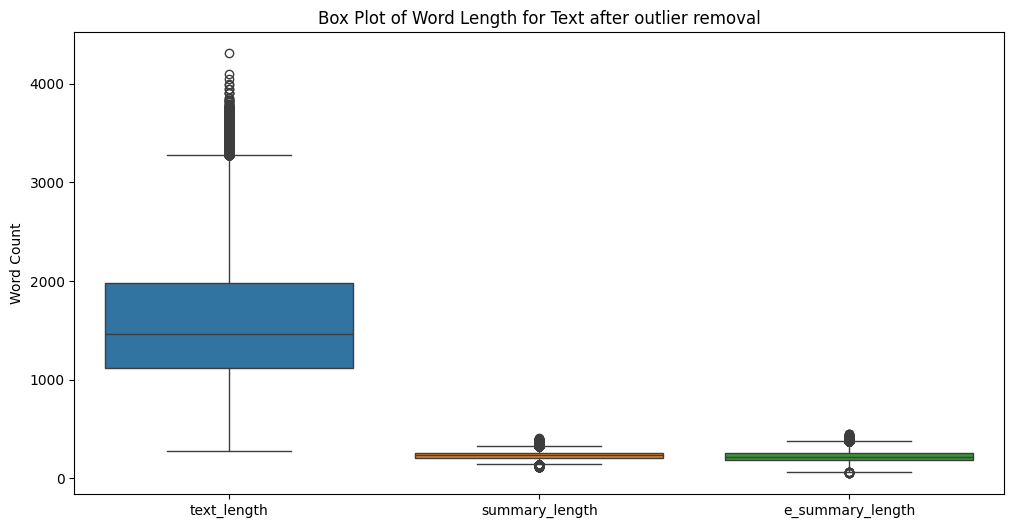

In [59]:
# prompt: show boxplot of train_df_filtered

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df_no_outliers[['text_length','summary_length','e_summary_length']])
plt.title('Box Plot of Word Length for Text after outlier removal')
plt.ylabel('Word Count')
plt.show()

In [60]:
# prompt: rename the train_df_no_outliers to train2_df

train2_df = train_df_no_outliers


In [64]:
train2_df.iloc[1]

,1
id,205215
url,https://www.liputan6.com/news/read/205215/defo...
text,striker timnas inggris yang main s...
summary,tanding lawan manchester city rupa ...
e_summary,striker timnas inggris yang main sama tottenha...


In [65]:
# prompt: see the outlier in train2_df

# Calculate the IQR for each column
Q1_text = train2_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_text = train2_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

Q1_summary = train2_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_summary = train2_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
lower_bound_summary = Q1_summary - 1.5 * IQR_summary
upper_bound_summary = Q3_summary + 1.5 * IQR_summary


Q1_e_summary = train2_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_e_summary = train2_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
lower_bound_e_summary = Q1_e_summary - 1.5 * IQR_e_summary
upper_bound_e_summary = Q3_e_summary + 1.5 * IQR_e_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = train2_df[
    ~(train2_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
      train2_df['summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
      train2_df['e_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary))
]

print("Outliers in train2_df:")
print(outliers)


Outliers in train2_df:
            id                                                url  \
1       205215  https://www.liputan6.com/news/read/205215/defo...   
9       212975  https://www.liputan6.com/news/read/212975/pers...   
75      262375  https://www.liputan6.com/news/read/262375/demi...   
102      89818  https://www.liputan6.com/news/read/89818/jalur...   
136     214673  https://www.liputan6.com/news/read/214673/il-t...   
...        ...                                                ...   
193685  259892  https://www.liputan6.com/news/read/259892/weng...   
193791  210187  https://www.liputan6.com/news/read/210187/keeg...   
193803   38083  https://www.liputan6.com/news/read/38083/dpp-p...   
193850  233043  https://www.liputan6.com/news/read/233043/dicu...   
193867  298620  https://www.liputan6.com/news/read/298620/bank...   

                                                     text  \
1         striker   timnas   inggris   yang   main   s...   
9         partai   kandang

In [66]:
# prompt: delete that rows that assumed as outlier in train2_df

# Remove rows with outliers
train2_df_no_outliers = train2_df[
    train2_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
    train2_df['summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
    train2_df['e_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary)
]

print("Original DataFrame shape:", train2_df.shape)
print("DataFrame shape after removing outliers:", train2_df_no_outliers.shape)


Original DataFrame shape: (174494, 5)
DataFrame shape after removing outliers: (169058, 5)


In [68]:
train2_df_no_outliers.iloc[1]

,2
id,146657
url,https://www.liputan6.com/news/read/146657/rama...
text,liputan6 com jakarta harga...
summary,harga bahan pokok seperti minyak g...
e_summary,liputan6 com jakarta harga jumlah butuh pok...


<ipython-input-71-0c5ace14a45f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2_df_no_outliers['text_length'] = train2_df_no_outliers['text'].apply(lambda x: len(str(x).split()))
<ipython-input-71-0c5ace14a45f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2_df_no_outliers['summary_length'] = train2_df_no_outliers['summary'].apply(lambda x: len(str(x).split()))
<ipython-input-71-0c5ace14a45f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

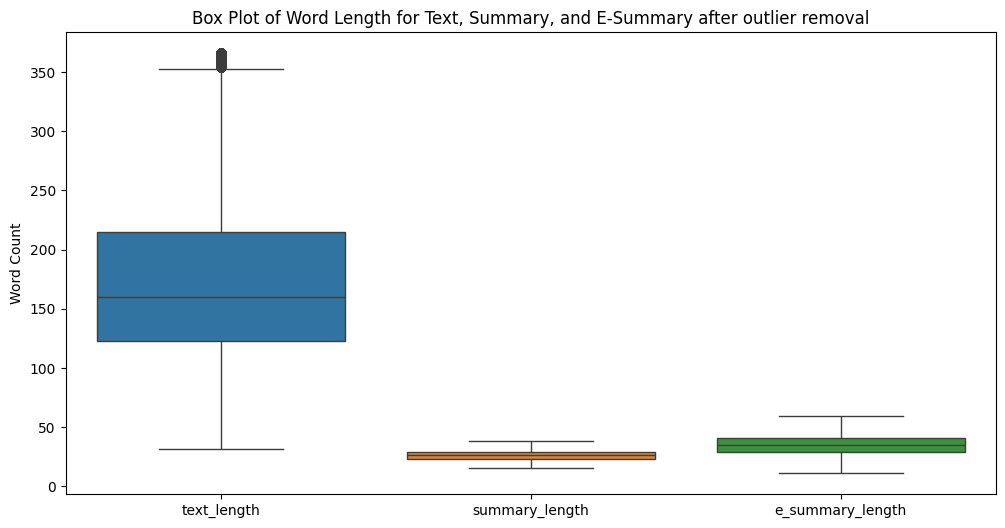

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the word lengths for each column and store them in new columns
train2_df_no_outliers['text_length'] = train2_df_no_outliers['text'].apply(lambda x: len(str(x).split()))
train2_df_no_outliers['summary_length'] = train2_df_no_outliers['summary'].apply(lambda x: len(str(x).split()))
train2_df_no_outliers['e_summary_length'] = train2_df_no_outliers['e_summary'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
# Use the new columns for the boxplot
sns.boxplot(data=train2_df_no_outliers[['text_length', 'summary_length', 'e_summary_length']])
plt.title('Box Plot of Word Length for Text, Summary, and E-Summary after outlier removal')
plt.ylabel('Word Count')
plt.show()

In [72]:
train2_df_no_outliers.shape

(169058, 8)

In [73]:
train_df = train2_df_no_outliers

In [74]:
train_df.shape

(169058, 8)

In [75]:
train_df.iloc[1
              ]

,2
id,146657
url,https://www.liputan6.com/news/read/146657/rama...
text,liputan6 com jakarta harga...
summary,harga bahan pokok seperti minyak g...
e_summary,liputan6 com jakarta harga jumlah butuh pok...
text_length,196
summary_length,26
e_summary_length,35


In [76]:
# prompt: see outlier in text_length in train_df

# Calculate the IQR for 'text_length'
Q1_text = train_df['text_length'].quantile(0.25)
Q3_text = train_df['text_length'].quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

# Find rows with outliers in 'text_length'
outliers_text = train_df[
    ~train_df['text_length'].between(lower_bound_text, upper_bound_text)
]

print("Outliers in 'text_length':")
print(outliers_text)


Outliers in 'text_length':
            id                                                url  \
23      208688  https://www.liputan6.com/news/read/208688/ada-...   
36      118180  https://www.liputan6.com/news/read/118180/kant...   
185     216447  https://www.liputan6.com/news/read/216447/the-...   
203      96593  https://www.liputan6.com/news/read/96593/konsu...   
218      51415  https://www.liputan6.com/news/read/51415/air-n...   
...        ...                                                ...   
193489  267878  https://www.liputan6.com/news/read/267878/tali...   
193529  290388  https://www.liputan6.com/news/read/290388/pepe...   
193575  206330  https://www.liputan6.com/news/read/206330/lege...   
193577  274935  https://www.liputan6.com/news/read/274935/soal...   
193717  284441  https://www.liputan6.com/news/read/284441/stra...   

                                                     text  \
23        tanpa   ada   gejala   dan   tanda   belum  ...   
36        liputan6    

In [77]:
# prompt: delete the data rows that assumed as outlier in train_df

# Remove rows with outliers in 'text_length'
train_df_no_outliers = train_df[
    train_df['text_length'].between(lower_bound_text, upper_bound_text)
]

print("Original DataFrame shape:", train_df.shape)
print("DataFrame shape after removing outliers:", train_df_no_outliers.shape)

# Update train_df with the DataFrame without outliers
train_df = train_df_no_outliers


Original DataFrame shape: (169058, 8)
DataFrame shape after removing outliers: (167148, 8)


In [80]:
train_df_no_outliers.iloc[1]

,2
id,146657
url,https://www.liputan6.com/news/read/146657/rama...
text,liputan6 com jakarta harga...
summary,harga bahan pokok seperti minyak g...
e_summary,liputan6 com jakarta harga jumlah butuh pok...
text_length,196
summary_length,26
e_summary_length,35


In [81]:
# prompt: drop the column text_length, summary_length, and e_summary_length in train_df_no_outliers

train_df_no_outliers = train_df_no_outliers.drop(['text_length', 'summary_length', 'e_summary_length'], axis=1)


In [84]:
train_df.iloc[1]

,2
id,146657
url,https://www.liputan6.com/news/read/146657/rama...
text,liputan6 com jakarta harga...
summary,harga bahan pokok seperti minyak g...
e_summary,liputan6 com jakarta harga jumlah butuh pok...


In [83]:
train_df = train_df_no_outliers

In [86]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_text = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_text = train_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

Q1_summary = train_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_summary = train_df['summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
lower_bound_summary = Q1_summary - 1.5 * IQR_summary
upper_bound_summary = Q3_summary + 1.5 * IQR_summary


Q1_e_summary = train_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_e_summary = train_df['e_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
lower_bound_e_summary = Q1_e_summary - 1.5 * IQR_e_summary
upper_bound_e_summary = Q3_e_summary + 1.5 * IQR_e_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = train_df[
    ~(train_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
      train_df['summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
      train_df['e_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary))
]

print("Outliers in train_df:")
print(outliers)



Outliers in train_df:
            id                                                url  \
402     213510  https://www.liputan6.com/news/read/213510/soal...   
831     256788  https://www.liputan6.com/news/read/256788/riwa...   
897     251067  https://www.liputan6.com/news/read/251067/indo...   
1124    170900  https://www.liputan6.com/news/read/170900/penu...   
1292    202342  https://www.liputan6.com/news/read/202342/juve...   
...        ...                                                ...   
191600  208300  https://www.liputan6.com/news/read/208300/take...   
191986  131580  https://www.liputan6.com/news/read/131580/wapr...   
191997  215277  https://www.liputan6.com/news/read/215277/asa-...   
192145   80790  https://www.liputan6.com/news/read/80790/menke...   
193193   73957  https://www.liputan6.com/news/read/73957/atrib...   

                                                     text  \
402       bursa   calon   manajer   newcastle   united...   
831       liputan6       co

In [87]:
# prompt: delete those 793 rows as outlier in train_df

# Remove rows with outliers
train_df_no_outliers = train_df[
    train_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
    train_df['summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
    train_df['e_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary)
]

print("Original DataFrame shape:", train_df.shape)
print("DataFrame shape after removing outliers:", train_df_no_outliers.shape)

# Update train_df with the DataFrame without outliers
train_df = train_df_no_outliers


Original DataFrame shape: (167148, 5)
DataFrame shape after removing outliers: (166355, 5)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

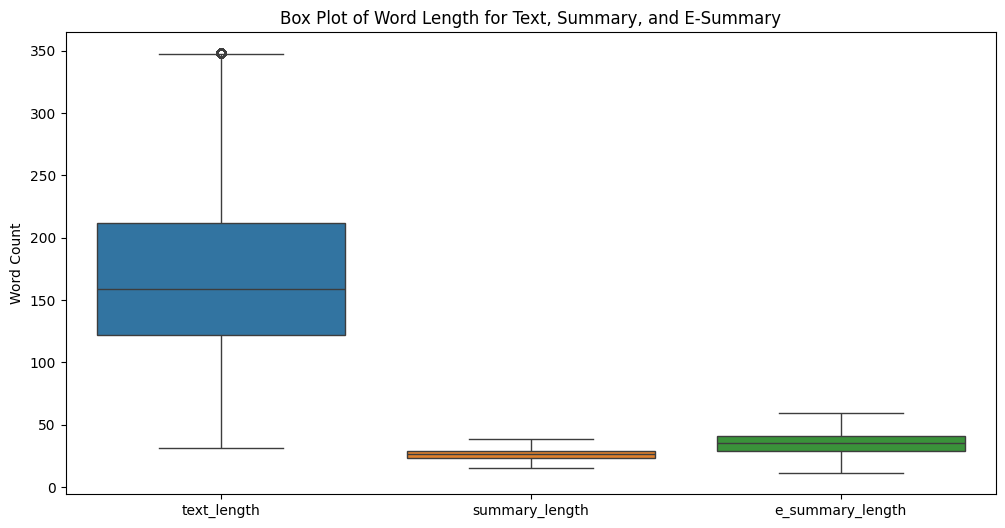

In [88]:
# prompt: make a boxplot based on train_df for column text, summary, and e_summary

plt.figure(figsize=(12, 6))
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x).split()))
train_df['summary_length'] = train_df['summary'].apply(lambda x: len(str(x).split()))
train_df['e_summary_length'] = train_df['e_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=train_df[['text_length', 'summary_length', 'e_summary_length']])
plt.title('Box Plot of Word Length for Text, Summary, and E-Summary')
plt.ylabel('Word Count')
plt.show()


In [92]:
train_df.shape

(166355, 8)

In [89]:
train_raw_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/train_reformed.csv')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

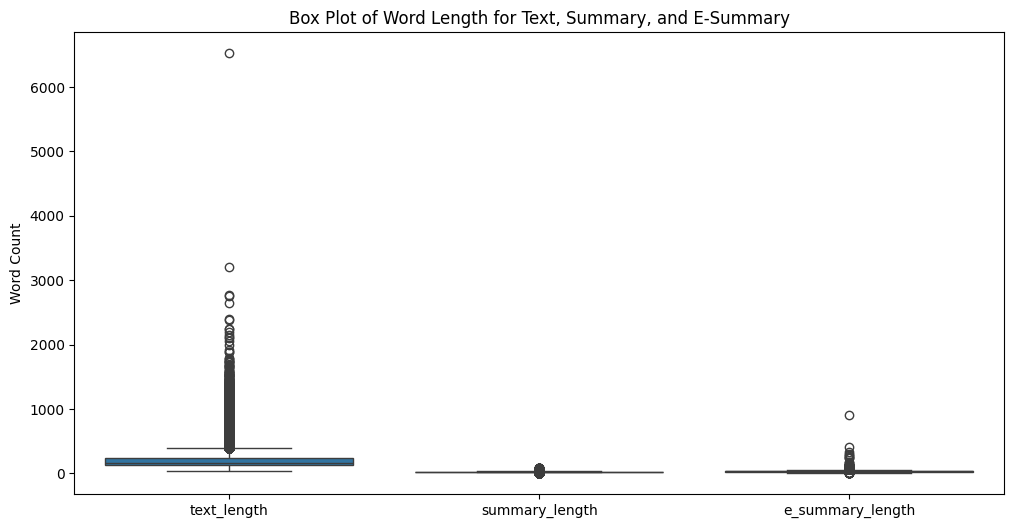

In [90]:

plt.figure(figsize=(12, 6))
train_raw_df['text_length'] = train_raw_df['text'].apply(lambda x: len(str(x).split()))
train_raw_df['summary_length'] = train_raw_df['summary'].apply(lambda x: len(str(x).split()))
train_raw_df['e_summary_length'] = train_raw_df['e_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=train_raw_df[['text_length', 'summary_length', 'e_summary_length']])
plt.title('Box Plot of Word Length for Text, Summary, and E-Summary')
plt.ylabel('Word Count')
plt.show()

In [91]:
train_raw_df.shape


(193883, 8)

In [98]:

train_df

,id,url,text,summary,e_summary
0,238168,https://www.liputan6.com/news/read/238168/hayk...,liputan6 com jakarta telah...,artis muda haykal dan putri titan ...,liputan6 com jakarta telah jalan uji nasion...
2,146657,https://www.liputan6.com/news/read/146657/rama...,liputan6 com jakarta harga...,harga bahan pokok seperti minyak g...,liputan6 com jakarta harga jumlah butuh pok...
3,123694,https://www.liputan6.com/news/read/123694/evak...,liputan6 com kupang evakua...,evakuasi warga negara indonesia dari...,dalam empat hari ini 1 540 wni telah angkut ...
4,139266,https://www.liputan6.com/news/read/139266/gunu...,liputan6 com lembata pusat...,status gunung batutara tetap siaga ...,lahar panas juga keluar dari bagi belah timur ...
5,57375,https://www.liputan6.com/news/read/57375/puluh...,liputan6 com jakarta puluh...,polisi pamong praja pemda jakarta ...,haryono jakarta timur hanya bisa mangu tatap...
...,...,...,...,...,...
193878,196443,https://www.liputan6.com/news/read/196443/seba...,liputan6 com padang banyak...,jumlah serta jamsostek nonaktif jauh...,ia sebut jumlah serta jamsostek nonaktif itu ...
193879,126536,https://www.liputan6.com/news/read/126536/razi...,liputan6 com jakarta telah...,razia kerja seks komersial yang ge...,lokasi memang kenal bagai kawasan tempat mangk...
193880,142536,https://www.liputan6.com/news/read/142536/bers...,liputan6 com bandung manta...,i nyoman sumaryadi kembali periksa ...,sejak kemarin nyoman kena status sangka nyom...
193881,125546,https://www.liputan6.com/news/read/125546/lint...,ingat 40 hari pascagempa color ...,ingat 40 hari pascagempa bumi yogy...,ingat 40 hari pascagempa color ffff00 liputa...


In [99]:
# prompt: save the train_df in csv file

train_df.to_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/train_df_no_outliers.csv', index=False)


In [100]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/reformed_dataset/train_df_no_outliers.csv')

In [101]:
df

,id,url,text,summary,e_summary
0,238168,https://www.liputan6.com/news/read/238168/hayk...,liputan6 com jakarta telah...,artis muda haykal dan putri titan ...,liputan6 com jakarta telah jalan uji nasion...
1,146657,https://www.liputan6.com/news/read/146657/rama...,liputan6 com jakarta harga...,harga bahan pokok seperti minyak g...,liputan6 com jakarta harga jumlah butuh pok...
2,123694,https://www.liputan6.com/news/read/123694/evak...,liputan6 com kupang evakua...,evakuasi warga negara indonesia dari...,dalam empat hari ini 1 540 wni telah angkut ...
3,139266,https://www.liputan6.com/news/read/139266/gunu...,liputan6 com lembata pusat...,status gunung batutara tetap siaga ...,lahar panas juga keluar dari bagi belah timur ...
4,57375,https://www.liputan6.com/news/read/57375/puluh...,liputan6 com jakarta puluh...,polisi pamong praja pemda jakarta ...,haryono jakarta timur hanya bisa mangu tatap...
...,...,...,...,...,...
166350,196443,https://www.liputan6.com/news/read/196443/seba...,liputan6 com padang banyak...,jumlah serta jamsostek nonaktif jauh...,ia sebut jumlah serta jamsostek nonaktif itu ...
166351,126536,https://www.liputan6.com/news/read/126536/razi...,liputan6 com jakarta telah...,razia kerja seks komersial yang ge...,lokasi memang kenal bagai kawasan tempat mangk...
166352,142536,https://www.liputan6.com/news/read/142536/bers...,liputan6 com bandung manta...,i nyoman sumaryadi kembali periksa ...,sejak kemarin nyoman kena status sangka nyom...
166353,125546,https://www.liputan6.com/news/read/125546/lint...,ingat 40 hari pascagempa color ...,ingat 40 hari pascagempa bumi yogy...,ingat 40 hari pascagempa color ffff00 liputa...
